Select NDSI_Snow_Cover from MOD10A.006 for Red Mountain Pass, CO  (37°53′56″N 107°42′43″W) for 1 Oct 2000 - 1 Oct 2015

In [7]:
import re
import os
import urllib
import netCDF4
import numpy as np
import ipywidgets as widgets
import matplotlib.pyplot as plt
import xml.etree.ElementTree as ET
from ipywidgets import interact
from urllib.error import HTTPError
from mpl_toolkits.basemap import Basemap
from datetime import datetime, timedelta

TIMEFRAME = [datetime(2000, 10, 1), datetime(2015, 10, 1)]
MODIS_BASE_URL = "http://n5eil01u.ecs.nsidc.org:80/opendap/MOST/MOD10A1.006/"
MODIS_AREA_IDENTIFIER = "h09v05"
ARRAY_SIZE_LIMIT = 1000

def daterange(timeframe):
    for n in range(int ((timeframe[1] - timeframe[0]).days)):
        yield timeframe[0] + timedelta(n)  

def form_smashed_date(date):
    return str(date.year) + str(date.month).zfill(2) + str(date.day).zfill(2)
          
def form_dotted_date(date):
    return str(date.year) + "." + str(date.month).zfill(2) + "." + str(date.day).zfill(2)

def get_filesystem_dataset(date):
    path = "./MODIS/MODIS_h09v05_" + form_smashed_date(date) + ".nc"
    print(path)
    return path

def dataset_lats(dataset):
    return dataset["Latitude"][:,:]

def dataset_lons(dataset):
    return dataset["Longitude"][:,:]

def dataset_values(dataset):
    return dataset["NDSI_Snow_Cover"][:,:]


./MODIS/MODIS_h09v05_20010723.nc
[[ 44.47570422  44.47570422  44.47570422 ...,  44.47570422  44.47570422
   44.47570422]
 [ 44.4710711   44.4710711   44.4710711  ...,  44.4710711   44.4710711
   44.4710711 ]
 [ 44.46643797  44.46643797  44.46643797 ...,  44.46643797  44.46643797
   44.46643797]
 ..., 
 [ 33.37009841  33.37009841  33.37009841 ...,  33.37009841  33.37009841
   33.37009841]
 [ 33.36546528  33.36546528  33.36546528 ...,  33.36546528  33.36546528
   33.36546528]
 [ 33.36083215  33.36083215  33.36083215 ...,  33.36083215  33.36083215
   33.36083215]]
[[-100.07323021 -100.06859708 -100.06396395 ...,  -88.96762439
   -88.96299126  -88.95835814]
 [-100.07323021 -100.06859708 -100.06396395 ...,  -88.96762439
   -88.96299126  -88.95835814]
 [-100.07323021 -100.06859708 -100.06396395 ...,  -88.96762439
   -88.96299126  -88.95835814]
 ..., 
 [-100.07323021 -100.06859708 -100.06396395 ...,  -88.96762439
   -88.96299126  -88.95835814]
 [-100.07323021 -100.06859708 -100.06396395 ..., 

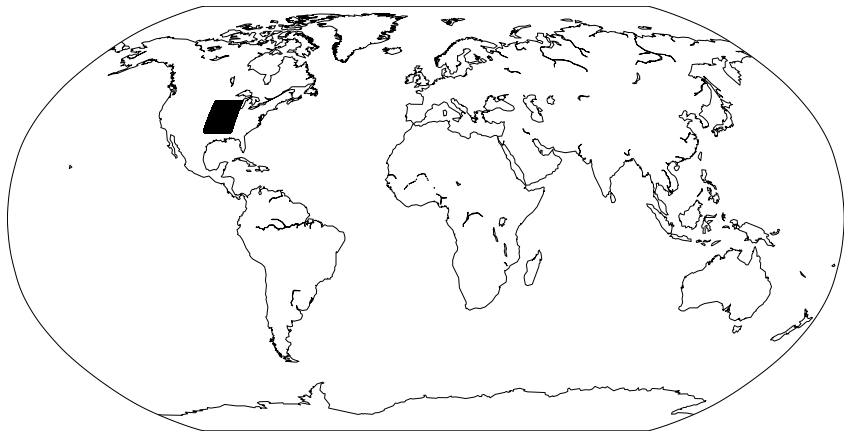

In [9]:
%matplotlib inline
def draw_figure(dataset):
    lats = dataset_lats(dataset) * 0.00001
    lons = dataset_lons(dataset) * 0.00001
    values = dataset_values(dataset)
    
    print(lats)
    print(lons)
    
    plt.figure(figsize=(15,15))
    #b = Basemap(projection='stere', lat_0=50,lon_0=-105,resolution='c', llcrnrlon=-110, llcrnrlat=35,urcrnrlon=-105, urcrnrlat=40)
    b = Basemap(projection='robin',lon_0=0,resolution='c')
    b.drawcoastlines()
    #b.drawstates()
    #b.drawcounties()
    b.scatter(lons, lats, s=5, color='black', latlon=True)
    #b.pcolor(lats, lons, values, latlon=True)
    
#@interact(num=widgets.IntSlider(min=0,max=2318,value=0,step=1,continuous_update=False))
#def show_it(num=0):
#    dataset = netCDF4.Dataset(get_filesystem_dataset(num))
#    draw_figure(dataset)

dataset = netCDF4.Dataset(get_filesystem_dataset(datetime(2001, 7, 23)))
draw_figure(dataset)